<a href="https://colab.research.google.com/github/parkir/ML_Projects/blob/master/Various%20Classification%20Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score, train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
# Load dataset
dataset = pd.read_csv('/content/gdrive/My Drive/Thesis/Thesis-shared/data/WineWithHeader.csv')

In [ ]:
# Retrieve rows from dataset
X = dataset.iloc[:,1:]
y = dataset.iloc[:,0]

# Feature Scaling
slc= StandardScaler()
X = slc.fit_transform(X)

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Algorithm:  Logistic Regression
Accuracy:  1.0
              precision    recall  f1-score   support

           1      1.000     1.000     1.000        14
           2      1.000     1.000     1.000        16
           3      1.000     1.000     1.000         6

    accuracy                          1.000        36
   macro avg      1.000     1.000     1.000        36
weighted avg      1.000     1.000     1.000        36

-----Confusion Matrix-----


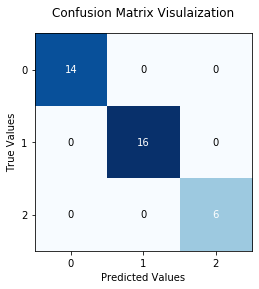

Confusion Matrix:
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


_____________________________________________________________________________________

Algorithm:  Naive Bayes
Accuracy:  0.9166666666666666
              precision    recall  f1-score   support

           1      0.875     1.000     0.933        14
           2      1.000     0.812     0.897        16
           3      0.857     1.000     0.923         6

    accuracy                          0.917        36
   macro avg      0.911     0.938     0.918        36
weighted avg      0.928     0.917     0.915        36

-----Confusion Matrix-----


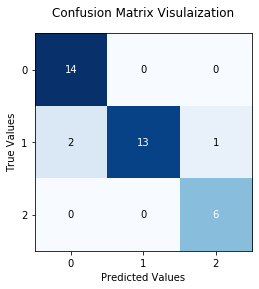

Confusion Matrix:
 [[14  0  0]
 [ 2 13  1]
 [ 0  0  6]]


_____________________________________________________________________________________

Algorithm:  k Nearest Neighbor 
Accuracy:  0.9722222222222222
              precision    recall  f1-score   support

           1      1.000     1.000     1.000        14
           2      1.000     0.938     0.968        16
           3      0.857     1.000     0.923         6

    accuracy                          0.972        36
   macro avg      0.952     0.979     0.964        36
weighted avg      0.976     0.972     0.973        36

-----Confusion Matrix-----


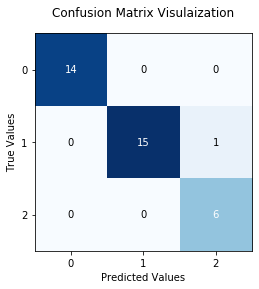

Confusion Matrix:
 [[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]


_____________________________________________________________________________________

Algorithm:  Support Vector Machine
Accuracy:  1.0
              precision    recall  f1-score   support

           1      1.000     1.000     1.000        14
           2      1.000     1.000     1.000        16
           3      1.000     1.000     1.000         6

    accuracy                          1.000        36
   macro avg      1.000     1.000     1.000        36
weighted avg      1.000     1.000     1.000        36

-----Confusion Matrix-----


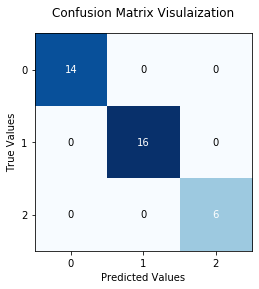

Confusion Matrix:
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


_____________________________________________________________________________________



In [ ]:
# Define each model
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('k Nearest Neighbor ', KNeighborsClassifier()))
models.append(('Support Vector Machine', SVC()))

for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    # Predict
    prediction = model.predict(X_test)
    # Accuracy
    accuracy = accuracy_score(y_test, prediction)
    print("Algorithm: ", name)
    print("Accuracy: ", accuracy)
    # Precision, Recall, f1-score
    m = metrics.classification_report(y_test,prediction, digits=3)
    print(m)
    print("-----Confusion Matrix-----")
    cm = confusion_matrix(y_test, prediction)
    fig, ax = plot_confusion_matrix(conf_mat=cm)
    plt.ylabel("True Values")
    plt.xlabel("Predicted Values")
    plt.title("Confusion Matrix Visulaization")
    plt.show()
    print("Confusion Matrix:\n", cm)
    print("\n")


    print("_____________________________________________________________________________________\n")
  
